## Análisis univariado
En esta sección se realiza el análisis univariado de los datos, a partir de herramientas de visualización y tablas que nos sugieran ciertos patrones entre el target y los predictores.

In [ ]:
import pandas as pd 
import numpy as np # numpy y pandas to data wrangling 
from datetime import datetime, timedelta # to work w date
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
import seaborn as sns
from seaborn import distplot
import scipy as scp

El análisis univariado es el primario y más básico. Consiste en analizar cada una de las variables estudiadas por separado, basándose exclusivamente en una variable.



Para comenzar, importamos el dataset crudo con el target a predecir y los predictores que vamos a utilizar. Como variable a predecir, utilizamos el precio diario de la criptomoneda ethereum, promediando su cotización de apertura y clausura. 

Debido a que se intenta seguir la lógica establecida en el enfoque de validación, es decir, extraer de la base un subconjunto para entrenamiento y otro para testeo, este análisis se realiza sobre los datos que se van a entrenar. La razón radica en que los datos que son para testeo del modelo serán utilizados únicamente a modo de evaluación, entendiéndose a los mismos como datos "desconocidos" al momento de explorar la base y ajustar los modelos. Por esto, una vez importado el dataset nos quedamos con los primeros años de la serie, que va desde el 8 de agosto de 2015 hasta el 31 de diciembre de 2020.  

In [ ]:
# importamos dataset
aux = 'https://drive.google.com/file/d/1GWaKdMRk4Fx9qGgBMioNeO3E7_I3bA8k/view?usp=sharing'
link ='https://drive.google.com/uc?id=' + aux.split('/')[-2]
df = pd.read_csv(link)
df = df.set_index('Date')

# subconjunto a utilizar: dataset de entrenamiento
start = df.index[0]
train = df[start:'2020-12-31']
train.head()

,Volume USDT_btc,cryptocurrency_adjusted,crypto_adjusted,bitcoin_adjusted,bitcoin price_adjusted,ethereum_adjusted,ethereum price_adjusted,stock market_adjusted,wall street_adjusted,interest rate_adjusted,...,y_lag4,y_lag5,y_lag6,y_lag7,unix_btc,open_btc,high_btc,low_btc,close_btc,Volume BTC_btc
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-08,3.8010,0.0,0.48,1.74,0.27,0.0,0.0,1.45,8.32,16.38,...,2.150,1.825,1.310,1.645,1438992000,275.92,282.24,262.65,263.00,1032.69
2015-08-11,0.9435,0.0,0.88,1.89,0.49,0.0,0.0,2.61,9.92,19.74,...,1.825,1.310,1.645,1.520,1439251200,266.22,269.26,261.61,269.26,247.49
2015-08-12,2.5580,0.0,0.87,1.83,0.47,0.0,0.0,3.48,10.40,20.58,...,1.310,1.645,1.520,1.410,1439337600,269.26,275.63,263.33,265.41,682.19
2015-08-13,3.1890,0.0,0.87,1.95,0.35,0.0,0.0,2.61,10.40,18.48,...,1.645,1.520,1.410,1.515,1439424000,265.41,269.88,260.00,263.00,838.99
2015-08-14,2.1290,0.0,0.83,1.68,0.32,0.0,0.0,2.32,10.88,16.80,...,1.520,1.410,1.515,1.615,1439510400,263.00,265.00,255.00,265.00,556.23


In [ ]:
# Información de la composición del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, 2015-08-08 to 2022-06-14
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Volume USDT_btc              2499 non-null   float64
 1   cryptocurrency_adjusted      2499 non-null   float64
 2   crypto_adjusted              2499 non-null   float64
 3   bitcoin_adjusted             2499 non-null   float64
 4   bitcoin price_adjusted       2499 non-null   float64
 5   ethereum_adjusted            2499 non-null   float64
 6   ethereum price_adjusted      2499 non-null   float64
 7   stock market_adjusted        2499 non-null   float64
 8   wall street_adjusted         2499 non-null   float64
 9   interest rate_adjusted       2499 non-null   float64
 10  fed_adjusted                 2499 non-null   float64
 11  bankruptcy_adjusted          2499 non-null   float64
 12  china_adjusted               2499 non-null   float64
 13  united s

Como se puede observar, el dataframe se compone de 53 columnas y 2499 filas. Entre las variables utilizadas como predictoras, se encuentra la cotización de cierre y apertura del bitcoin, como su volumen diario de transacciones. Además, el dataset contiene frecuencia de las tendencias de google relacionadas al mercado de criptomonedas como las palabras *cryptocurrency, crypto, bitcoin, ethereum price, interest rate*, entre otros. A su vez, la base de datos a utilizar no contiene valores nulos.

A continuación se observa la estadística descriptiva de la frecuencia relativa de las palabras buscadas en Google en el período dado.

Debido a que las frecuencias diarias de búsqueda de google se calculan en relación al valor máximo de toda la serie, se puede inferir que las variables que tienen promedio de búsqueda muy bajos podrían ser consideradas variables "de momento". Con este término nos referimos a palabras que se ponen de moda en un período corto en relación al período de toda la serie. Por el contrario, variables que tienen un promedio de frecuencia de búsqueda muy altas, parecerían ser aquellas con una evolución temporal más regular.

Esto lleva a plantear como hipótesis que las variables "de momento" podrían correlacionarse con los cambios abruptos del precio de las cotizaciones de Ethereum. En cambio, palabras con promedio de búsqueda diario alto podrían tener menor correlación con grandes movimientos de la cotización de ethereum. Los promedios, junto con otros estadísticos como los quintiles y desvío estándar pueden observarse en la siguiente tabla.  


In [ ]:
df.loc[:, ['adjusted' in i for i in df.columns]].describe().T.sort_values(by='mean', ascending=False).apply(lambda s: s.apply('{0:.5f}'.format))

,count,mean,std,min,25%,50%,75%,max
banking_adjusted,2499.00000,65.53982,14.03591,0.00000,55.56000,67.89000,75.33000,100.00000
investment_top_adjusted,2499.00000,45.39372,12.16000,0.00000,38.18500,45.60000,53.94000,79.00000
taxes_adjusted,2499.00000,43.54414,13.68105,0.00000,33.55000,42.90000,51.68000,92.00000
interest rate_adjusted,2499.00000,42.05728,16.47968,0.00000,28.91000,39.65000,53.94000,97.00000
foreign_currency_adjusted,2499.00000,41.68705,13.28344,0.00000,33.52000,41.86000,48.97000,98.00000
future_commodities_adjusted,2499.00000,37.37268,13.75892,0.00000,27.14000,35.67000,42.78000,100.00000
china_adjusted,2499.00000,30.61341,8.16596,0.00000,27.33000,31.68000,34.40000,100.00000
bankrup_top_adjusted,2499.00000,30.47424,13.00300,0.00000,20.20500,28.60000,40.15000,78.00000
war_adjusted,2499.00000,27.08813,10.47154,0.00000,20.70000,27.00000,33.12000,100.00000
digital_wallet_top_adjusted,2499.00000,26.52101,16.44897,0.00000,13.26000,21.84000,35.91000,100.00000


### Variable a predecir: precio diario promedio de ethereum 

En primer lugar, observamos la serie del precio diario promedio de ethereum, nuestra variable a predecir. Como se puede ver en la primera figura, la serie presenta un componente irregular no despreciable, la serie comienza los primeros años con valores cercanos a cero, para luego aumentar abruptamente, generando un diferentes picos desde mediados de 2017 hasta mediados de 2019 aproximadamente. Luego, la cotización permanece estable alrededor de los 200 usdt hasta mediados de 2020, donde la misma comienza a subir. Dicha irregularidad presenta una alta volatilidad o varianza, por lo que sería deseable poder aplicar alguna transformación a la serie antes de predecir.  

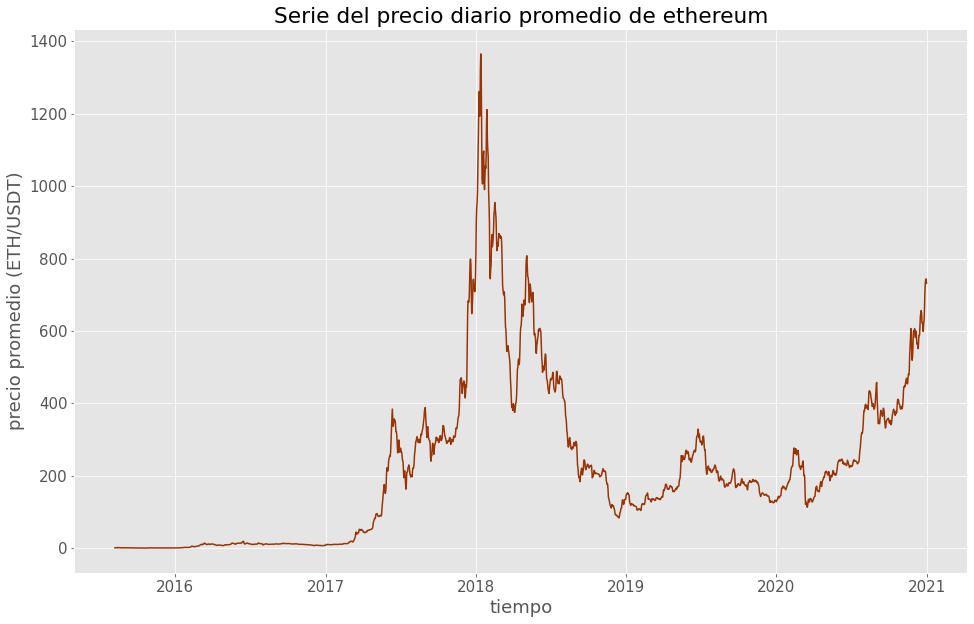

In [ ]:
mpl.style.use('ggplot') # set estilo
mpl.rcParams.update({'font.size': 15}) # set tamaño de ticks
# graficamos la base ethereum completa
train.index = pd.to_datetime(train.index)
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(train['y_lag1'], color='#993404')
plt.ylabel("precio promedio (ETH/USDT)")
plt.xlabel("tiempo")
plt.title("Serie del precio diario promedio de ethereum");

Aclaración: la variable `y_lag1` representa el precio de ethereum con un rezago de 1 día y será utilizada para la predicción del precio del día siguiente al precio presente observado.


Por lo tanto, `y_lag{i}` con `i = 1, ..., 7` será utilizado para predecir el precio del día {i} luego del último día observado.

La transformación elegida es la transformación logarítmica, la cual permite una compresión de los datos, generando una serie con menor nivel de irregularidad y, por lo tanto, con mejor comportamiento para predecir. A continuación, se presenta la serie del precio promedio de ethereum diario en logaritmo. 

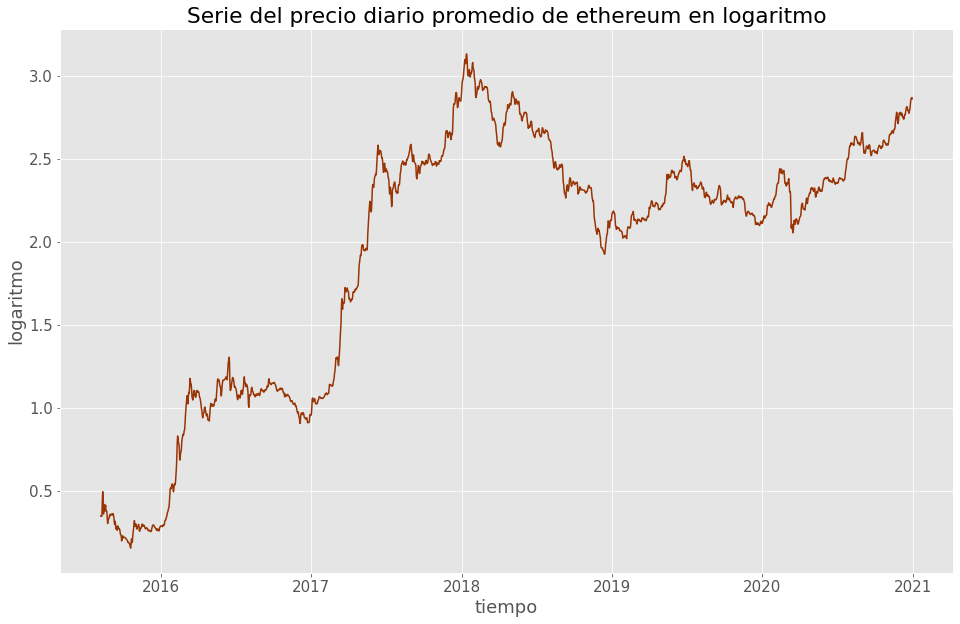

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(np.log10(train['y_lag1']+1), color='#993404')
plt.ylabel("logaritmo")
plt.xlabel("tiempo")
plt.title("Serie del precio diario promedio de ethereum en logaritmo");

Así, luego de aplicar el logaritmo, se logra mayor suavidad en el gráfico en comparación con los valores iniciales de la cotización.

### Análisis por variable

Seleccionaremos las variables que consideramos más significativas para realizar su análisis univariado.

Por un lado, elegimos como primera variable el precio de bitcoin, considerando que es muy común leer o escuchar dentro de comunidades crypto y en Internet en general que las altcoins (criptomonedas alternativas, ethereum es una de ellas) siguen la tendencia de bitcoin.

Por otro lado, a partir de la tabla de estadísticas descriptivas mostrado antes, seleccionamos dos de las primeras variables y dos de las últimas que allí aparecen, es decir, dos de las que presentan el mayor promedio de búsquedas diario y dos de los de menor, respectivamente. Repasando la idea de los indicadores de palabras, las mismas se calculan asignando el número 100 al valor máximo de toda la serie, a partir de este se calcula la tasa de búsqueda de los demás días respecto a ese valor máximo. Por lo que la interpretación de la proporción de búsqueda se realiza en base a ese valor pico. 

### Gráficos de línea 

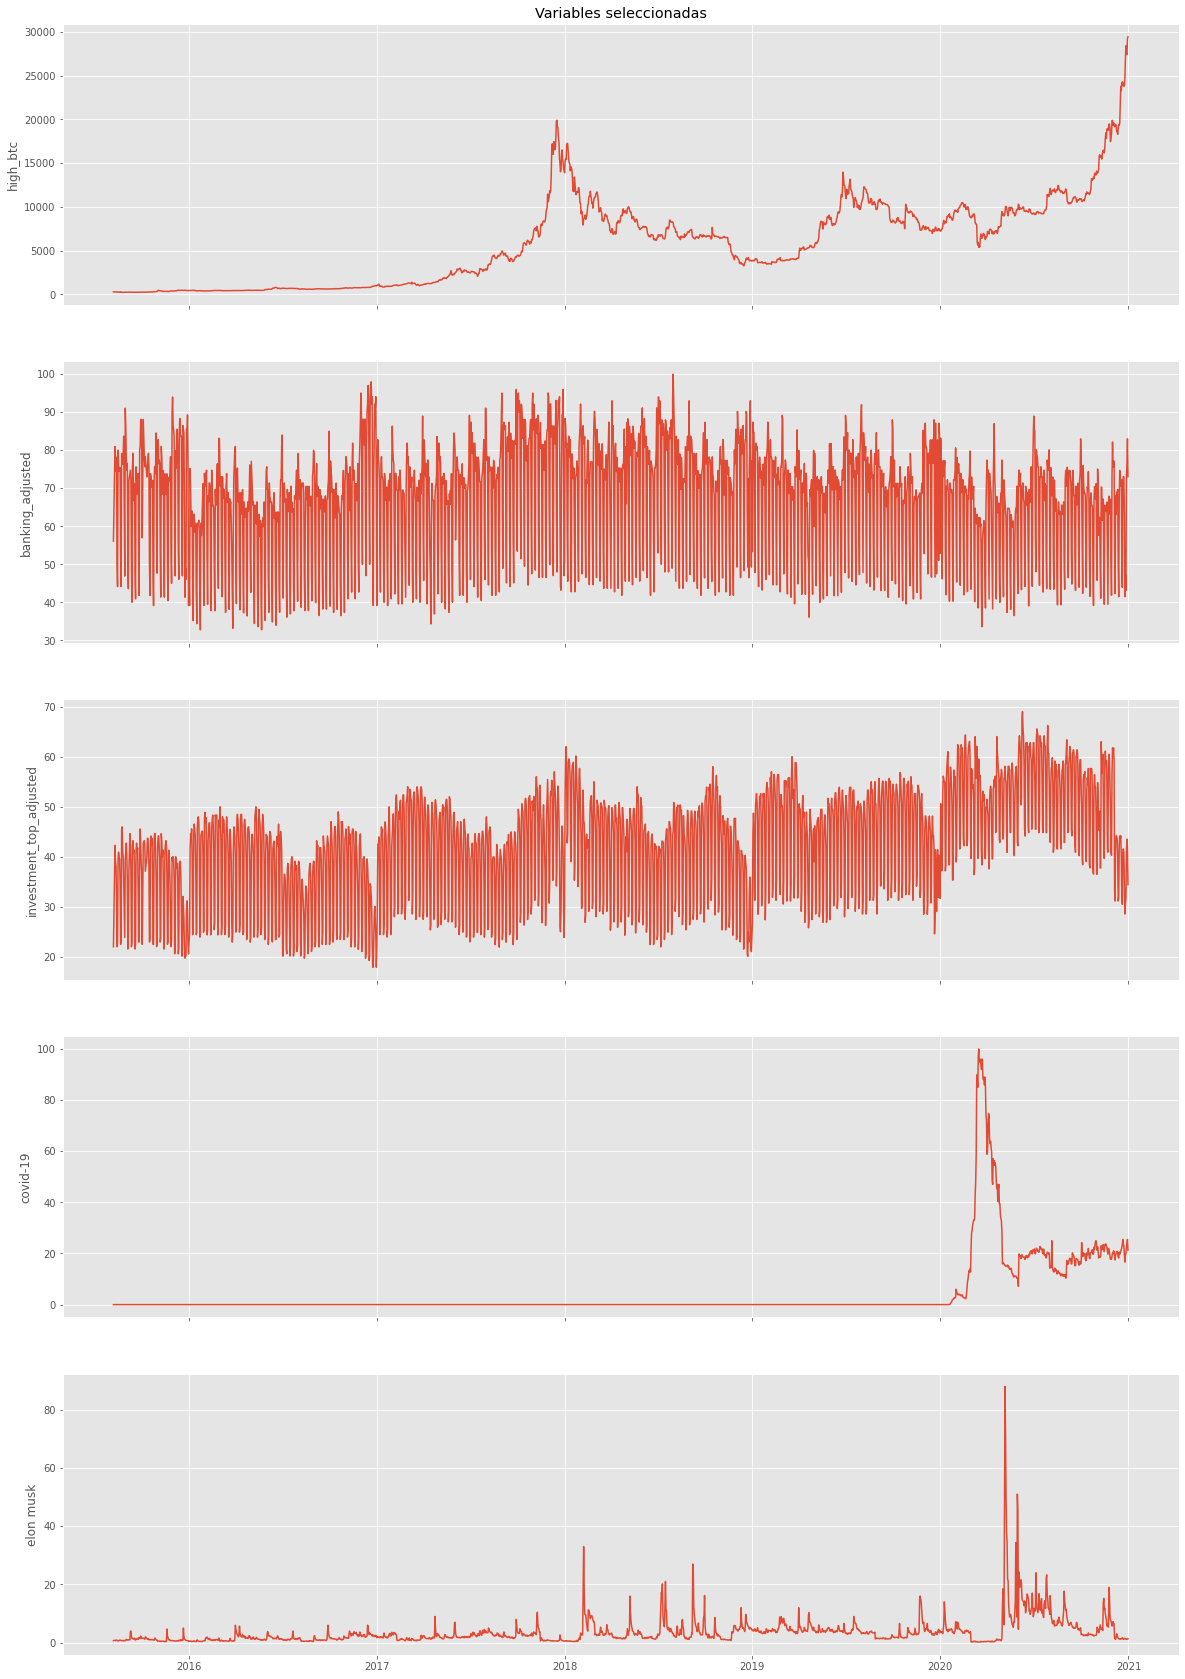

In [ ]:
mpl.rcParams.update({'font.size': 10}) # set tamaño de ticks
# defino el tamaño del gráfico
fig, ax = plt.subplots(nrows = 5, ncols=1, figsize=(20,30), sharex=True)

# armo el gráfico
ax[0].plot(train['high_btc'])
ax[1].plot(train['banking_adjusted'])
ax[2].plot(train['investment_top_adjusted'])
ax[3].plot(train['covid19_adjusted'])
ax[4].plot(train['elon musk_adjusted'])

ax[0].set_title('Variables seleccionadas')
ax[0].set_ylabel('high_btc');
ax[1].set_ylabel('banking_adjusted')
ax[2].set_ylabel('investment_top_adjusted');
ax[3].set_ylabel('covid-19');
ax[4].set_ylabel('elon musk');

Como puede verse, la serie de la palabra *bitcoin* sigue muy de cerca la evolución del precio de ethereum, con un primer pico en 2018 y una tendencia positiva durante el 2020. Por otra parte, variables constantes como *banking* e *investment* no parecen tener cambios agudos que puedan tener una asociación con las fluctuaciones de ethereum, mientras que la búsqueda de *covid_19* lógicamente comienza a aparecer masivamente recién en 2020. En el caso de *elon musk*, la misma también aparece con mayor frecuencia durante el año 2020, aunque también tiene picos de menor nivel durante el 2018.  

### Histogramas y densidad

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


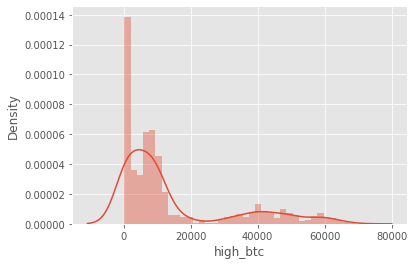

In [ ]:
distplot(df.high_btc);

El precio de bitcoin se concentra en valores menores a 20.000 USD.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


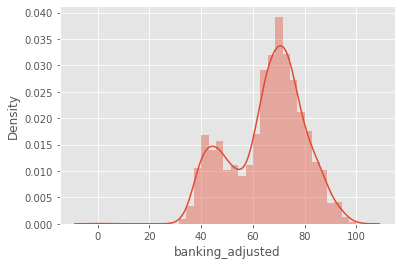

In [ ]:
distplot(df.banking_adjusted);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


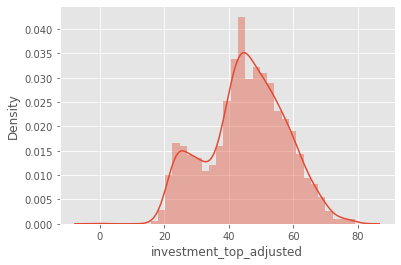

In [ ]:
distplot(df.investment_top_adjusted)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


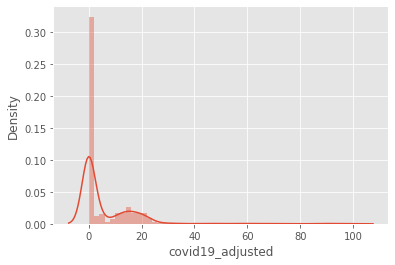

In [ ]:
distplot(df.covid19_adjusted)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


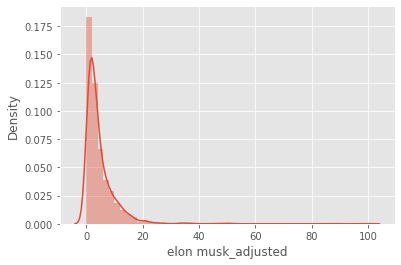

In [ ]:
distplot(df['elon musk_adjusted'])

Un histograma con mayor extensión en el eje x, en este caso nos indicaría que es una palabra cuya frecuencia de búsqueda se da en manera más uniforme a lo largo del período de tiempo seleccionado, como es el caso de *banking_adjusted* e *investment_top_adjusted*.

Por el contrario, un histograma más concentrado, con menor extensión en el eje x, nos indicaría una palabra cuya frecuencia de búsqueda se da con mayor fuerza durante un corto período.

Como es esperable en el caso de *covid 19* y *elon musk* sus distribuciones son altamente sesgadas a derecha, debido a que al ser búsquedas "de momento" tendría muchos valores cercanos a cero y pocas frecuencias positivas. En cambio, las variables *investment* y *banking* tienen valores que se acumulan más cerca del valor 100, presentando ambos una distribución bimodal. 